Epoch 1/1000
MSE: 0.4348, Accuracy: 0.3524
Epoch 101/1000
MSE: 0.1123, Accuracy: 0.8286
Epoch 201/1000
MSE: 0.0792, Accuracy: 0.9048
Epoch 301/1000
MSE: 0.0579, Accuracy: 0.9238
Epoch 401/1000
MSE: 0.0409, Accuracy: 0.9429
Epoch 501/1000
MSE: 0.0309, Accuracy: 0.9619
Epoch 601/1000
MSE: 0.0253, Accuracy: 0.9524
Epoch 701/1000
MSE: 0.0220, Accuracy: 0.9524
Epoch 801/1000
MSE: 0.0199, Accuracy: 0.9524
Epoch 901/1000
MSE: 0.0184, Accuracy: 0.9619


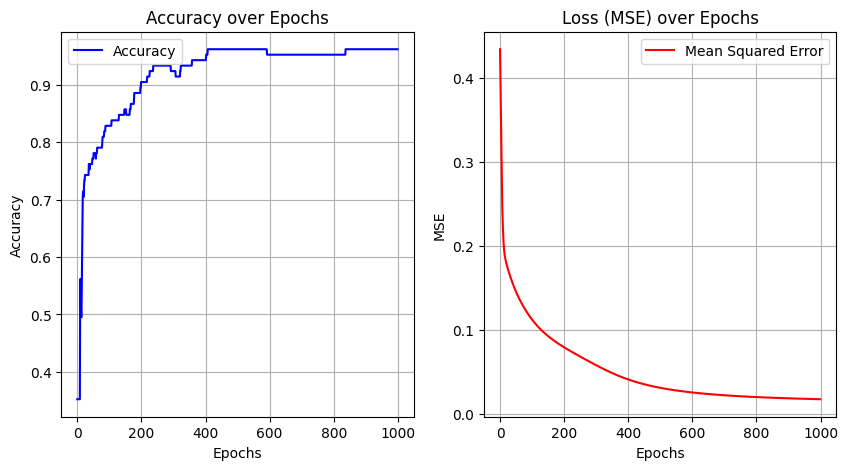

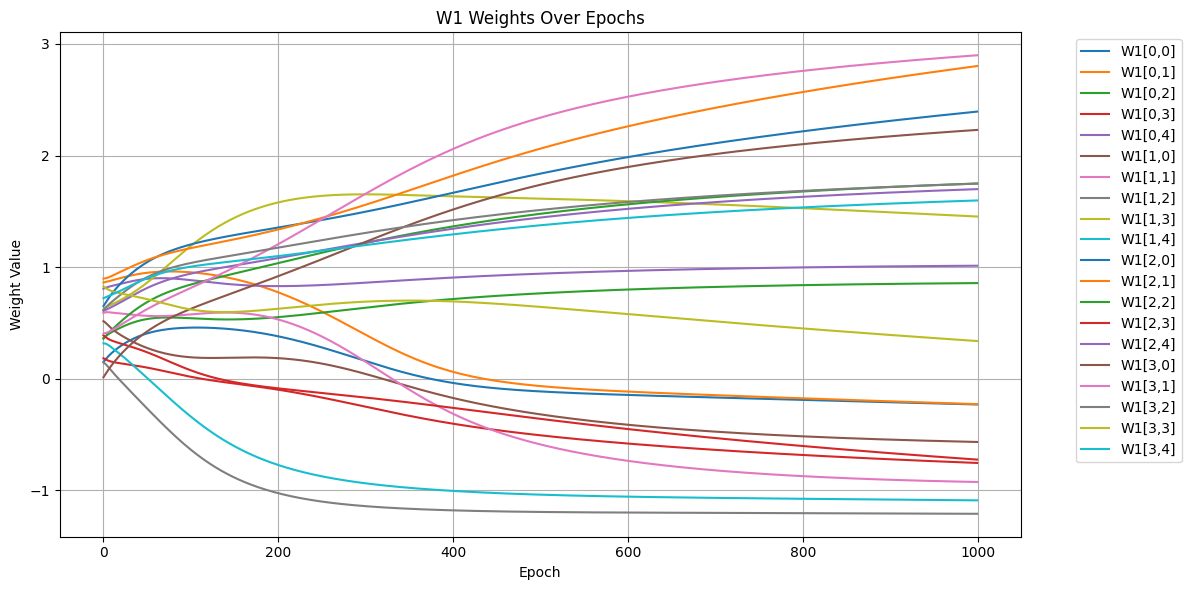

Test Accuracy: 1.0000


In [ ]:
#EXP3 - FORWARDPROPOGATION AND BACKPROPOGATION
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.rand(input_size, hidden_size)
    W2 = np.random.rand(hidden_size, output_size)
    b1 = np.random.rand(1, hidden_size)
    b2 = np.random.rand(1, output_size)
    return W1, W2, b1, b2

def forward_propagation(X, W1, W2, b1, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(X, y, Z1, A1, A2, W2):
    error = y - A2
    dZ2 = error * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    return dW1, dW2, db1, db2, error

W1, W2, b1, b2 = initialize_weights(input_size, hidden_size, output_size)

learning_rate = 0.01
epochs = 1000
mse_history = []
accuracy_history = []
W1_history = []
W2_history = []

for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, W2, b1, b2)
    dW1, dW2, db1, db2, error = backward_propagation(X_train, y_train, Z1, A1, A2, W2)
    mse = np.mean(np.square(error))
    mse_history.append(mse)

    W1 += learning_rate * dW1
    W2 += learning_rate * dW2
    b1 += learning_rate * db1
    b2 += learning_rate * db2

    W1_history.append(W1.copy())
    W2_history.append(W2.copy())

    predictions = np.argmax(A2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == labels)
    accuracy_history.append(accuracy)

    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}')
        print(f'MSE: {mse:.4f}, Accuracy: {accuracy:.4f}')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), accuracy_history, label="Accuracy", color="blue")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), mse_history, label="Mean Squared Error", color="red")
plt.title("Loss (MSE) over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid()
plt.legend()

plt.figure(figsize=(12, 6))
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        plt.plot([W1_history[epoch][i, j] for epoch in range(epochs)], label=f'W1[{i},{j}]')
plt.title("W1 Weights Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

Z1_test, A1_test, Z2_test, A2_test = forward_propagation(X_test, W1, W2, b1, b2)

test_predictions = np.argmax(A2_test, axis=1)
test_labels = np.argmax(y_test, axis=1)
test_accuracy = np.mean(test_predictions == test_labels)

print(f'Test Accuracy: {test_accuracy:.4f}')
